# 분류

## 01 분류의 개요

- 지도학습은 레이블(Label), 즉 명시적인 정답이 있는 데이터가 주어진 상태에서 학습하는 머신러닝 방식
- 지도학습의 대표적인 유형인 분류는 학습 데이터로 주어진 데이터의 피처와 레이블값(결정 값, 클래스 값)을 머신러닝 알고리즘으로 학습해 모델 생성 & 생성된 모델에 새로운 데이터 값이 주어졌을 때 미지의 레이블 값 예측  

## 02 결정 트리

- 데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만듦
- 규칙을 가장 쉽게 나타내는 방법은 if/else 기반
- 쉽게 생각하면 스무고개 게임

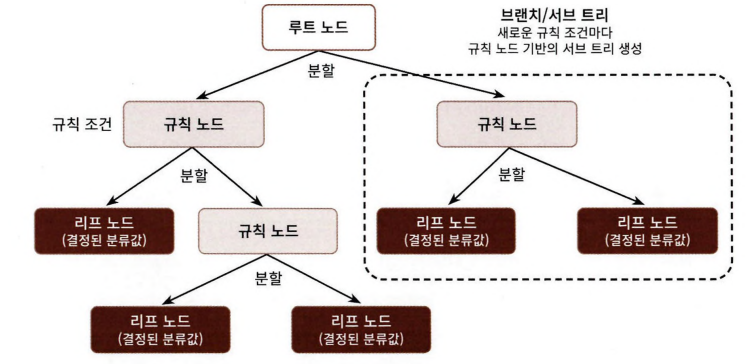

- 하지만 많은 규칙이 있다는 것은 분류를 결정하는 방식이 복잡 -> 과적합
- 즉 트리의 깊이(depth)가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성 높음
- 가능한 한 적은 결정 노드로 높은 예측 정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정노드가 정해져야!
- 어떻게 분할할 것인가? 최대한 균일한 데이터 세트로 구성!

- 정보의 균일도를 측정하는 대표적인 방법: 엔트로피를 이용한 정보 이득 지수, 지니 계수
- 정보 이득: 엔트로피라는 개념을 기반으로 함, 엔트로피는 주어진 데이터 집합의 혼합도 의미(서로 다른 값이 섞여 있으면 엔트로피 높고, 같은 값이 섞여 있으면 엔트로피 낮음). 정보 이득 지수는 1- 엔트로피 지수
- 지니 계수: 경제학에서 불평등 지수. 0이 가장 평등, 1로 갈수록 불평등

- 결정 트리 알고리즘을 사이킷런에서 구현한 DecisionTreeClassifier는 기본으로 지니 계수를 이용해 데이터 세트 분할
- 결정 트리의 일반적인 알고리즘은 데이터 세트를 분할하는 데 가장 좋은 조건, 즉 정보 이득이 높거나 지니 계수가 낮은 조건을 찾아서 자식 트리 노드에 걸쳐 반복적으로 분할한 뒤, 데이터가 모두 특정 분류에 속하게 되면 분할을 멈추고 분류 결정


### **결정 트리 모델의 특징**

- 장점: 쉽다, 직관적이다, 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음
- 단점: 과적합으로 알고리즘 성능이 떨어진다. 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요

### **결정 트리 파라미터**

- 사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier와 DecisionTreeRegressor 클래스를 제공함

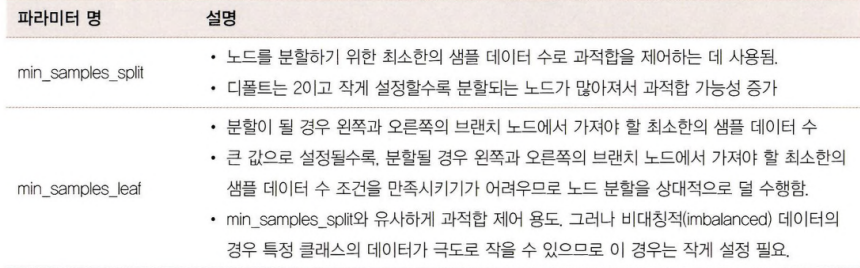

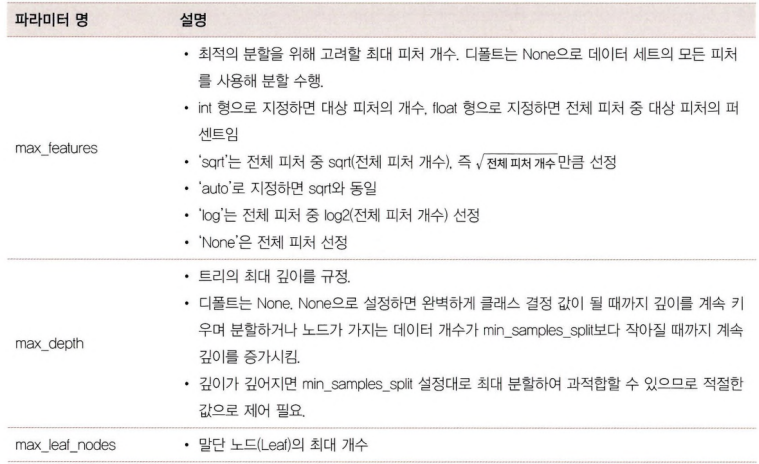

### **결정 트리 모델의 시각화**

- 결정 트리 알고리즘이 어떠한 규칙을 가지고 트리를 생성하는지 시각적으로 보여줄 수 있는 방법  -> Graphviz

- 붓꽃 데이터 세트를 이 DecisionTreeClassifer를 이용해 학습한 뒤 어떠한 형태로 규칙 트리가 만들어지는지 확인

In [7]:
## using graphviz
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot
## 아래 있는것은 필수는 아닌데, 가끔 에러가 생길 때가 있어서, 그냥 같이 해줌.
!apt-get install graphviz libgraphviz-dev pkg-config
!pip install pygraphviz
import pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4 pkg-config
0 upgraded, 10 newly installed, 2 to remove and 49 not upgraded.
Need to get 2,482 kB of archives.
After this operation, 7,670 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 pkg-config a

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 세트로 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target,test_size=0.2, random_state=11 )

# DecisionTreeClassifier 학습
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

In [9]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file='tree.dot', class_names=iris_data.target_names, \
                feature_names= iris_data.feature_names, impurity=True, filled=True)

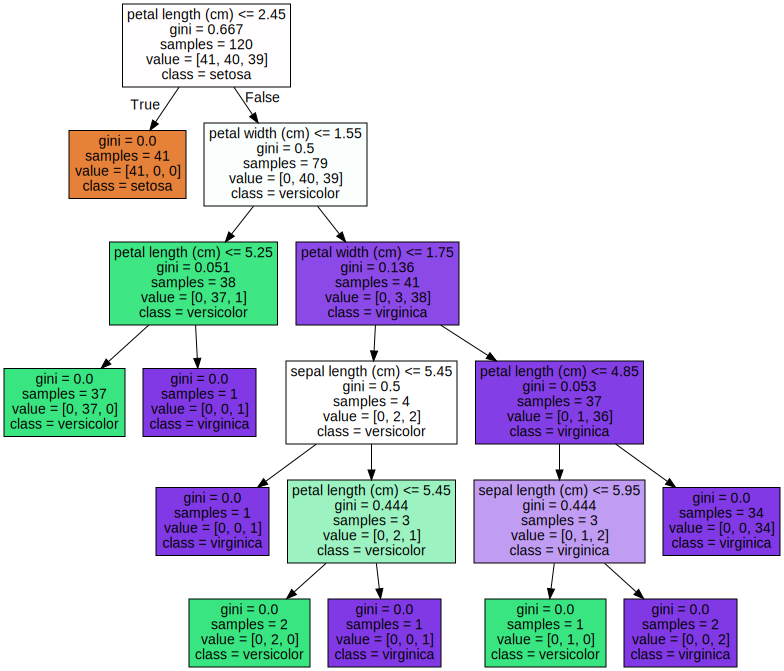

In [10]:
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
  dot_graph = f.read()
graphviz.Source(dot_graph)

- 먼저 더 이상 자식 노드가 없는 노드는 리프 노드. 즉 리프 노드는 최종 클래스(레이블) 값이 결정되는 노드
- 자식 노드가 있는 노드는 브랜치 노드이며 자식 노드를 만들기 위한 분할 규칙 조건을 가짐
- [노드 내 기술된 지표의 의미]
1. petal length(cm) <= 2.45 같이 피처의 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건. 이 조건 없으면 리프 노드
2. gini는 다음의 value=[ ]로 주어진 데이터 분포에서의 지니 계수
3. samples는 현 규칙에 해당하는 데이터 건수
4. values = [ ]는 클래스 값 기반의 데이터 건수. 만일 value= [41,40,39]라면 클래스 값의 순서로 Setosa 41개, Versicolor 40개, Virginica 39개의 데이터로 구성

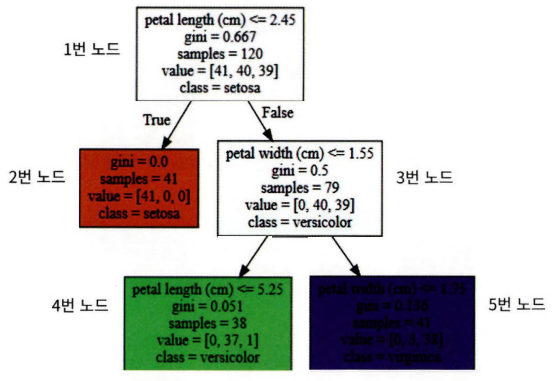

|__ 트리의 맨 윗부분 살펴보기 (**1번 노드)**
1. samples=120 는 전체 데이터가 120개란 의미
2. value = [41,40, 39]는 Setosa 41개 ,Versicolor 40개, Virginica 39개로 데이터 구성
3. sample 120개가 value = [41, 40,39] 분포도로 되어 있으므로 지니 계수는 0.66
4. petal length (cm)〈= 2.45 규칙으로 자식 노드 생성
5.  class = setosa는 하위 노드를 가질 경우에 setosa의 개수가 41 개로 제일 많다는 의미


- petal length(cm) <= 2.45 규칙이 True 또는 False로 분기하면 2번 3번 노드가 만들어짐

- **2번 노드**는 모든 데이터가 Setosa로
결정되므로 클래스가 결정된 리프 노드가 되고 더 이상 2번 노드에서 규칙을 만들 필요가 없음 (예측 클래스는 Setosa, 지니계수는 0)

- **3번 노드**는 Petal length (cm)〈= 2.45가 False인 규칙 노드. 79개의 샘플 중 Versicolor 40개, Virginica 39개로 여전히 지니 계수는 0.5로 높으므로 다음 자식 브랜치 노드로 분기할 규칙 필요. 따라서 petal width (cm)〈= 1.55 규칙으로 자식 노드 생성

- **4번 노드**는 Petal width (cm)〈= 1.55가 True인 규칙 노드. 38개의 샘플 데이터 중 Versicolor 37개, Virginica가 1개로 대부분이 versicolor임. 지니 계수는 0.051로 매우 낮으나 여전히 Versicolor와 Virginica가 혼재돼 있으므로 petal length(cm)〈= 5.25라는 새로운 규칙으로 다시 자식 노드 생성

- **5번 노드**는 Petal width (cm)〈= 1.55가 False인 규칙 노드. 41 개의 샘플 데이터 중 Versicolor 3개, Virginica가 38개로 대부분이 virginica임. 지니 계수는 0.136으로 낮으나 여전히 Versicolor와 Virginica가 혼재되어 있으므로 petal width(cm) <= 1.75라는 새로운
규칙으로 다시 자식 노드 생성

- 🎨각 노드의 색깔은 붓꽃 데이터의 레이블 값을 의미. 주황색은 0:Setosa, 초록색은 1:Versicolor, 보라색은 2:Virginica 레이블을 나타냄. 색깔이 짙을수록 지니계수가 낮고 해당 레이블에 속하는 샘플 데이터가 많다.

### **결정 트리의 파라미터 설명**

#### max_depth 파라미터
- 결정트리의 **max_depth** 하이퍼 파리미터는 결정 트리의 최대 트리 깊이를 제어함.
- 예를 들어, max_depth=3으로 설정하면 트리 깊이가 설정된 max_depth에 따라 줄어들면서 더 간단한 결정트리가 됨

#### min_samples_splits 파라미터
- **min_samples_splits** 하이퍼 파라미터는 자식 규칙 노드를 분할해 만들기 위한 최소한의 샘플 데이터 개수
- 예를 들어, min_samples_splits=4로 설정하면 샘플 개수가 3개인 노드는 더이상 분할하지 않고 리프 노드가 된다. 자연스럽게 트리 깊이도 줄고 더욱 간결한 결정 트리가 만들어짐(위의 그림과 상관X)


#### min_samples_leaf 파라미터
- **min_samples_leaf** 하이퍼 파라미터는 분할될 경구 왼쪽과 오른쪽 자식 노드 각각이 가지게 될 최소 데이터 건수를 지정. 즉 어떤 노드가 분할할 경우, 왼쪽과 오른쪽 자식 노드 중에 하나라도 min_samples_leaf로 지정된 최소 데이터 건수보다 더 작은 샘플 데이터 건수를 갖게 된다면, 해당 노드는 더 이상 분할하지 않고 리프 노드가 됨
- min_samples_leaf의 값을 키우면 분할할 수 있는 조건이 어렵게 되므로, 리프 노드가 될 수 있는 가능성이 높아짐

#### feature_importances 파라미터
- 결정 트리는 균일도에 기반해 어떠한 속성을 규칙 조건으로 선택하느냐가 중요한 요건이다.
- 사이킷런은 결정 트리 알고리즘이 학습을 통해 규칙을 정하는 데 있어 피처의 중요한 역할 지표를 DecisionTreeClassifier 객체의 **feature_importances_** 속성
으로 제공
- feature_importances_는 ndarray 형태로 값을 반환하며 피처 순서대로 값이 할당
- 피처가 트리 분할 시 정보 이득이나 지니 계수를 얼마나 효율적으로 잘 개선시켰는지를 정규화된 값
으로 표현
- 일반적으로 값이 높을수록 해당 피처의 중요도가 높다는 의미

Feature importance:
[0.025 0.    0.555 0.42 ]
sepal length (cm): 0.025
sepal width (cm): 0.000
petal length (cm): 0.555
petal width (cm): 0.420


<Axes: >

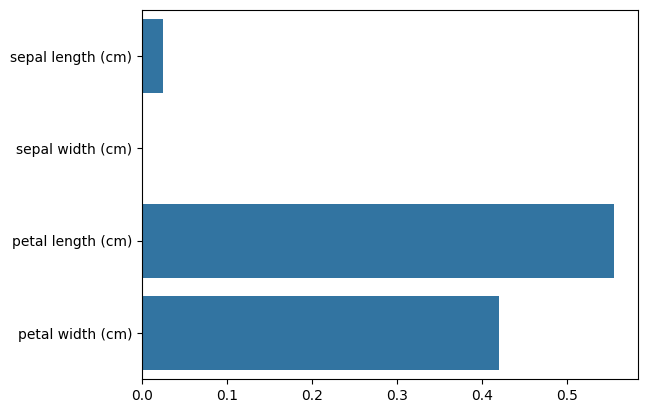

In [11]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature importance:\n{0}".format(np.round(dt_clf.feature_importances_, 3)))

# feature별 importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
  print('{0}: {1:.3f}'.format(name, value))

# feature importance를 column 별로 시각화하기
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

- 여러 피처들 중 petal_length가 가장 피처 중요도가 높음을 알 수 있다

### **결정 트리 과적합(Overfitting)**

#### 분류를 위한 데이터 세트 임의로 만들기

- make_classification() 호출 시 반환되는 객체는 피처 데이터 세트와 클래스 레이블 데이터 세트

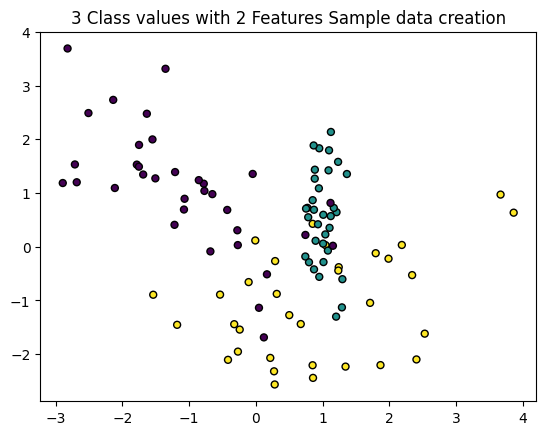

In [12]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('3 Class values with 2 Features Sample data creation')

# 2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(X_features[:,0], X_features[:,1], marker='o', c=y_labels, s=25, edgecolors='k')

- 각 피처가 X, Y축으로 나열된 2차원 그래프이며, 3개의 클래스 값 구분은 색깔로 돼 있다.

#### X_features와 y_labels 데이터 세트 기반으로 결정 트리 학습

In [13]:
def visualize_boundary(model, X, y):
    fig, ax = plt.subplots()

    # 학습 데이터 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    # model 학습
    model.fit(X, y)

    # meshgrid 형태인 모든 좌표값으로 예측 수행.
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # contourf() 를 이용하여 class boundary 를 visualization 수행.
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

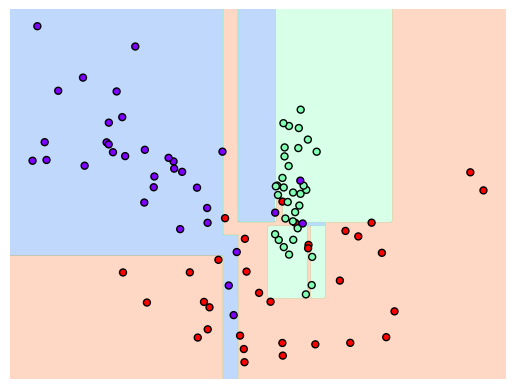

In [14]:
# 특정한 트리 생성 제약 없는 결정 트리의 학습과 결정 경계 시각화

from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- 일부 이상치(Outlier) 데이터까지 분류하기 위해 분할이 자주 일어나서 결정 기준 경계가 매우 많아졌음을 확인할 수 있다.
- 즉, 주어진 데이터에 맞추어 과적합 된 상태이며 이는 새로운 데이터에 대해서는 예측 정확도가 떨어질 수 밖에 없다.

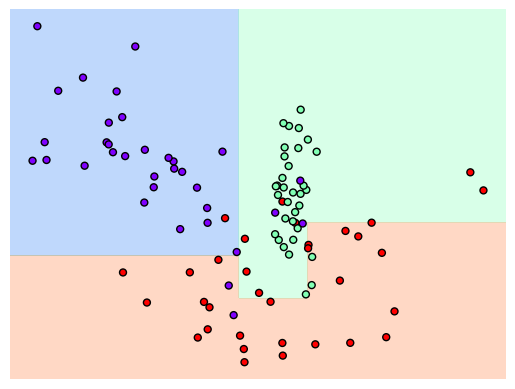

In [15]:
# min_samples_leaf=6으로 트리 생성 조건을 제약한 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6, random_state=156).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

- mean_samples_leaf를 6으로 설정하여 제약이 없는 경우에 비해 일반화된 분류 규칙에 따라 분류함을 알 수 있다.
- 다양한 결정 트리 모델의 예측 성능은 첫 번째 모델보다는 min_samples_leaf=6으로 트리 생성 조건을 제약한 모델이 더 뛰어날 가능성이 높다.


### 🤖결정 트리 실습 - 사용자 행동 인식 데이터 세트

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음 이를 DataFrame으로 로드
feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/human_activity/features.txt', sep='\s+', header=None, names=['column_index','column_name'])

print(feature_name_df.head())
print(feature_name_df.shape[0])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:,1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])

   column_index        column_name
0             1  tBodyAcc-mean()-X
1             2  tBodyAcc-mean()-Y
2             3  tBodyAcc-mean()-Z
3             4   tBodyAcc-std()-X
4             5   tBodyAcc-std()-Y
561
전체 피처명에서 10개만 추출: ['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X']


- features.txt에는 561개의 피처 index와 피처명이 저장되어있음

- 주의할 점으로 features.txt에는 중복된 피처명이 존재하며 이를 이용하여 데이터를 로드시 오류 발생



In [16]:
# 피처명 중복 확인

feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index']>1].count())
feature_dup_df[feature_dup_df['column_index']>1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


- 총 42개의 피처명 중복
- 이 중복된 피처명에 대해서 원본 피처명의 _1 또는 _2를 추가로 부여해 새로운 피처명을 가지는 DataFrame을 반환하는 함수인 get_new_feature_name_df( )생성

In [18]:
def get_new_feature_name_df(old_feature_name_df):
    # 중복 카운트 계산
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()

    # 데이터 병합
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')

    # 새로운 컬럼 이름 생성
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(
        lambda x: x[0] + '_' + str(x[1]) if x[1] > 0 else x[0], axis=1
    )

    # 인덱스 컬럼 제거
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)

    return new_feature_name_df

In [21]:
import pandas as pd

def get_human_dataset():

  # 각 데이터 파일은 공백으로 분리되어 있으므로 read_csv에서 공백 문자로 sep로 할당
  feature_name_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])

  # 중복된 피처명을 수정하는 get_new_feature_name_df를 이용, 신규 피처명 DataFrame 생성
  new_feature_name_df = get_new_feature_name_df(feature_name_df)

  # DataFrame에 피처명을 칼럼으로 부여하기 위해 리스트 객체로 다시 변환
  feature_name = new_feature_name_df.iloc[:,1].values.tolist()

  # 학습 피처 데이터세트와 테스트 피처 데이터를 DataFrame으로 로딩. 칼럼명은 feature_name으로 부여
  X_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
  X_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/human_activity/test/X_test.txt', sep='\s+', names=feature_name)

  # 학습 레이블과 테스트 레이블 데이터를 DataFrame으로 로딩하고 칼럼명은 action으로 부여
  y_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
  y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ESAA/data/human_activity/test/y_test.txt', sep='\s+', header=None, names=['action'])

  # 로드된 학습/테스트용 DataFrame 모두 반환
  return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_human_dataset()

<ipython-input-18-77fa237d946c>:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda x: x[0] + '_' + str(x[1]) if x[1] > 0 else x[0], axis=1


In [31]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())
print(X_train[:2])  # 많은 칼럼의 대부분이 움직임 위치와 관련된 속성임을 알 수 있다
print(X_train.shape)

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None
   tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-meanFreq()  \
0         -0.923527         -0.934724  ...                        -0.074323   
1         -0.957686         -0.943068  ...                         0.158075   

   fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
0          

- 학습 데이터 세트는 7352개의 레코드로 561개의 피처를 가지고 있다. 피처가 전부 float형의 숫자형이므로 별도의 카테고리 인코딩은 수행할 필요 없다

In [30]:
print(y_train['action'].value_counts())

action
6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: count, dtype: int64


- 사이킷런의 DecisionTreeClassifier를 이용해 동작 예측 분류를 수행하자!
- 먼저 DecisionTreeClassifier의 하이퍼 파라미터는 모두 디폴트값으로 설정해 수행하고, 이때의 하이퍼 파라미터 값을 모두 추출하겠음  

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('결정 트리 예측 정확도:, {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도:, 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 156, 'splitter': 'best'}


- 결정 트리의 경우 분류를 위해 리프 노드(클래스 결정 노드)가 될 수 있는 적합한 수준이 될 때까지 지속해서 트리의 분할을 수행하면서 깊이가 깊어진다고 앞서 말함
- **ⅰ.**GridSearchCV를 이용해 사이킷런
결정 트리의 깊이를 조절할 수 있는 하이퍼 파라미터인 max_depth 값을 변화시키면서 예측 성능을 확인해보자! (min_samples_split은 16으로 고정, 교차검증은 cv=5로, 5개 세트)

In [34]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [6,8,10,12,16,20,24],
    'min_samples_split': [16]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


- 5개의 cv 세트에서 max_depth값의 증가에 따라 예측 성능이 어떻게 변했는지 확인!

In [36]:
# GridSearchCV 객체의 cv_results_ 속성을 DataFrame으로 생성
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트 세트, 학습 데이터 세트의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.847662
1,8,0.854879
2,10,0.852705
3,12,0.845768
4,16,0.847127
5,20,0.848624
6,24,0.848624


- **ⅱ.** 별도의 테스트 데이터 세트에서 결정 트리의 정확도를 측정해보자

In [39]:
max_depths = [6,8,10,12,16,20,24]
# max_depth 값을 변화시키면서 그때마다 학습과 테스트 세트에서의 예측 성능 측정
for depth in max_depths:
  dt_clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=16, random_state=156)
  dt_clf.fit(X_train, y_train)
  pred = dt_clf.predict(X_test)
  accuracy = accuracy_score(y_test,pred)
  print('max_depth = {0} 정확도: {1:.4f}'.format(depth, accuracy))

max_depth = 6 정확도: 0.8551
max_depth = 8 정확도: 0.8717
max_depth = 10 정확도: 0.8599
max_depth = 12 정확도: 0.8571
max_depth = 16 정확도: 0.8599
max_depth = 20 정확도: 0.8565
max_depth = 24 정확도: 0.8565


- 복잡한 모델보다도 트리 깊이를 낮춘 단순한 모델이 더욱 효과적인 결과를 가져올 수 있다.

- **ⅲ.** max_depth와 min_samples_split을 같이 변경하면서 정확도 성능을 튜닝

In [41]:
params = {
    'max_depth' : [8, 12, 16, 20],
    'min_samples_split': [16, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(X_train,y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


- **ⅳ.** 앞 예제의 GridSearchCV 객체인 grid_cv의 속성인 best_estimator_는 최적 하이퍼 파라미터인 max depth 8,min_samples_split 16으로 학습이 완료된 Estimator 객체임

In [42]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy))

테스트 데이터 세트 정확도: 0.8717


- 결정 트리에서 각 피처의 중요도를 feature_importances_ 속성을 이용해 알아보자! 중요도가 높은 순으로 top20 피처를 막대그래프로 표현

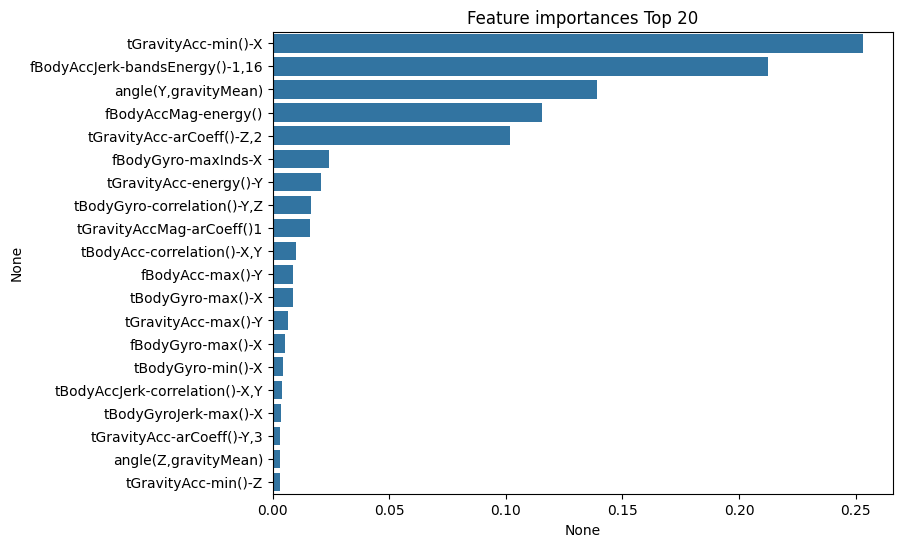

In [43]:
import seaborn as sns

ftr_importances_values = best_df_clf.feature_importances_
# Top 중요도로 정렬을 쉽게 하고, 시본의 막대그래프로 쉽게 표현하기 위해 Series 변환
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)
# 중요도값으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

- 가장 높은 중요도를 가진 top 5 피처들이 매우 중요하게 규칙 생성에 영향을 미치고 있음을 알 수 있다